Project Title : Analyzing Historical Stock and Revenue Data & Building an Interactive Dashboard

Project Overview :
This project focuses on collecting, analyzing, and visualizing historical stock price and revenue data for selected companies, using                   real-world financial data sourced from public websites and APIs. The goal is to create a comprehensive analysis pipeline and build an                    interactive dashboard that enables users to explore stock performance alongside revenue trends over time.

Objectives :
1. Data Collection: Scrape and extract financial data such as quarterly revenue and daily stock prices from reliable online sources.

2. Data Cleaning and Processing: Clean the raw data to remove inconsistencies, handle missing values, and convert formats for analysis.

3. Data Analysis: Perform time-series analysis on stock price movements and revenue trends, identifying correlations and patterns.

4. Visualization: Create interactive and insightful visualizations to compare stock price fluctuations with company revenue.

5. Dashboard Development: Build an easy-to-use dashboard that integrates all visualizations, allowing users to explore the financial health of companies                           in a single interface.

Technologies Used :
* Python: Core programming language for data extraction, processing, and analysis.

* Pandas: Data manipulation and cleaning.

* Requests & BeautifulSoup: Web scraping for revenue data.

* Matplotlib/Plotly/Seaborn: Data visualization libraries.

* Jupyter Notebook: Development environment for iterative coding and visualization.

* Dash or Streamlit: For building interactive dashboards.

Significance :
Understanding the relationship between a company’s stock price and its revenue provides valuable insight into market behavior and financial health. 
This project empowers investors, analysts, and enthusiasts to visualize complex financial data effectively, facilitating better investment decisions 
and financial analysis.

In [ ]:
'''Question 1 - Extracting Tesla Stock Data Using yfinance 
Question 2 - Extracting Tesla Revenue Data Using Webscraping 
Question 3 - Extracting GameStop Stock Data Using yfinance
Question 4 - Extracting GameStop Revenue Data Using Webscraping
Question 5 - Tesla Stock and Revenue Dashboard 
Question 6 - GameStop Stock and Revenue Dashboard '''

In [18]:
!pip install yfinance pandas matplotlib beautifulsoup4 requests

Q1 - Tesla Stock Data Using yfinance

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function

In [20]:
# Q1: Tesla Stock Data Using yfinance

import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Show first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Q2 - Tesla Revenue Data Using Web Scraping

In [44]:
!pip install html5lib


Display the last five rows of the tesla_revenue dataframe using the tail function. 

In [48]:
# Q2: Tesla Revenue Data Using Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Set headers to fake a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch page with headers
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Locate Tesla revenue table
tables = soup.find_all("table")
tesla_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# Raise an error if not found
if tesla_table is None:
    raise Exception("Tesla Revenue table not found.")

# Parse table into DataFrame
tesla_revenue = pd.read_html(str(tesla_table))[0]

# Clean the DataFrame
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[$,]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
print(tesla_revenue.tail())


          Date  Revenue
58  2010-09-30     31.0
59  2010-06-30     28.0
60  2010-03-31     21.0
62  2009-09-30     46.0
63  2009-06-30     27.0


C:\Users\banku\AppData\Local\Temp\ipykernel_6204\3477842769.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_table))[0]


Q3 - GameStop Stock Data Using yfinance

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [50]:
# Q3: GameStop Stock Data Using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Show first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Q4 - GameStop Revenue Data Using Web Scraping

Display the last five rows of the gme_revenue dataframe using the tail function. 

In [54]:
# Q4: GameStop Revenue Data Using Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the GameStop revenue table
tables = soup.find_all("table")
gme_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break

if gme_table is None:
    raise Exception("GameStop revenue table not found!")

# Convert to DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("[$,]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)

# Show last 5 rows
print(gme_revenue.tail())


          Date  Revenue
61  2010-01-31     3524
62  2009-10-31     1835
63  2009-07-31     1739
64  2009-04-30     1981
65  2009-01-31     3492


C:\Users\banku\AppData\Local\Temp\ipykernel_6204\1647146757.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_table))[0]


 Q5 - Tesla Stock and Revenue Dashboard 

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

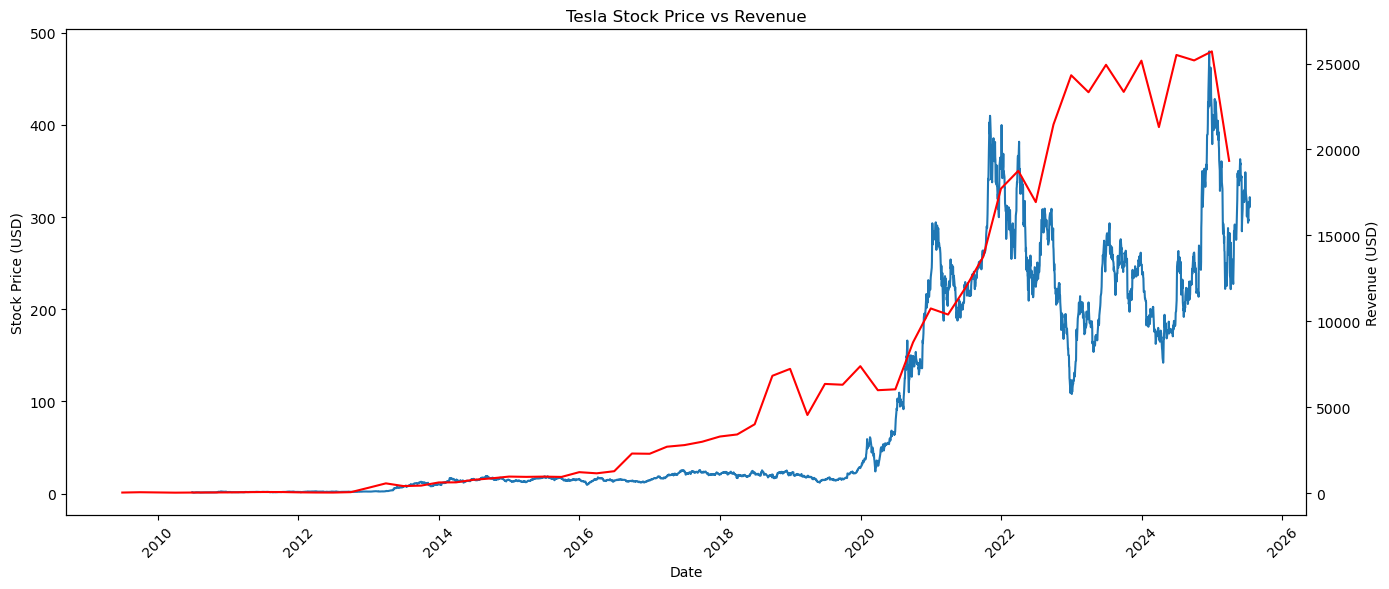

In [56]:
# Q5:  Tesla Stock and Revenue Dashboard 
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(pd.to_datetime(revenue_data['Date']), revenue_data['Revenue'].astype(float), color='red', label="Revenue")
    ax2.set_ylabel("Revenue (USD)")

    plt.title(f"{stock_name} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


Q6 - GameStop Stock vs Revenue Dashboard

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

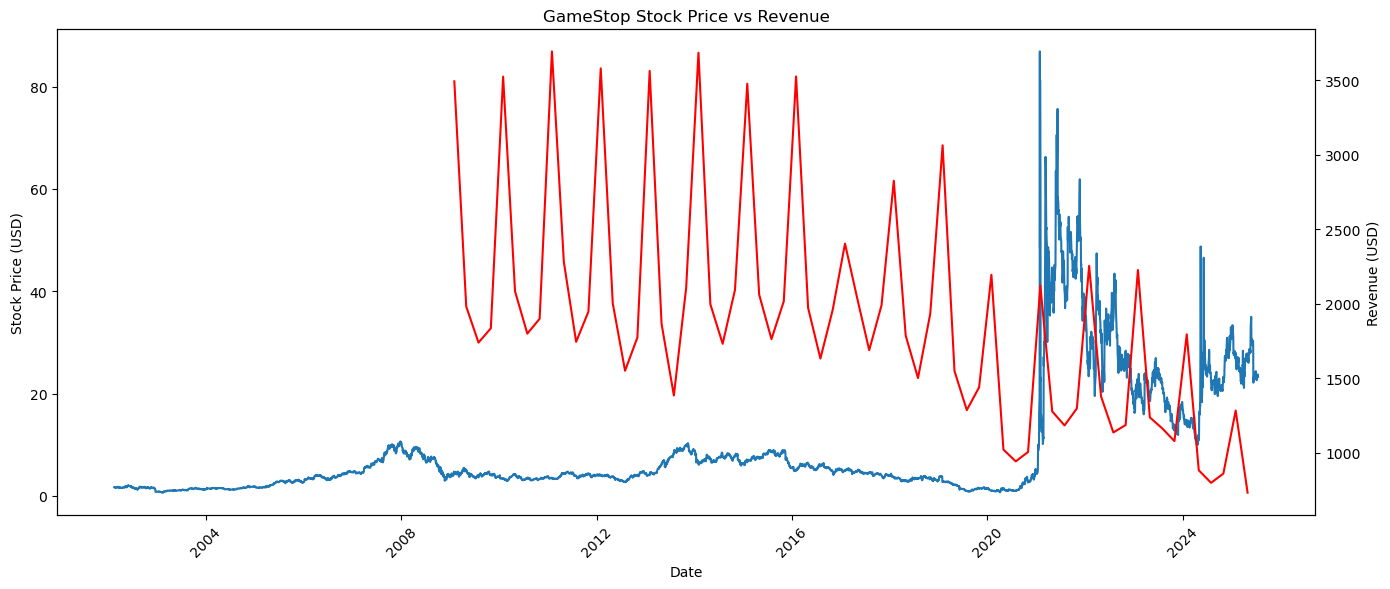

In [58]:
# Q6: GameStop Stock vs Revenue Dashboard

make_graph(gme_data, gme_revenue, "GameStop")


Conclusion :
* In this project, we successfully gathered and analyzed historical stock price and revenue data for major companies by leveraging web scraping techniques and financial data APIs. Through thorough data cleaning and processing, we ensured the datasets were accurate and ready for analysis.
* The visualizations and dashboards created provide clear insights into how stock prices correlate with company revenue over time. This integrated approach allows investors and analysts to better understand market dynamics and the financial health of the companies they follow.
* Overall, this project demonstrates the power of combining data science, web scraping, and interactive visualization to turn raw financial data into actionable insights. Future enhancements could include adding more companies, incorporating advanced forecasting models, and deploying the dashboard as an accessible web application.